# Training Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x

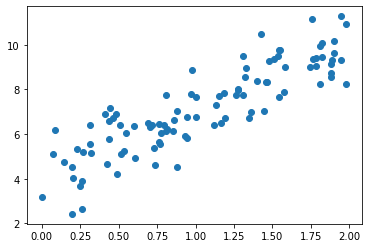

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
X[0]

array([0.8598966])

In [6]:
X_b = np.c_[np.ones((100,1)), X] # adding x0 = 1 to all instances
X_b[0]

array([1.       , 0.8598966])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal equation, closed-form solution
theta_best

array([[4.07032588],
       [2.97152368]])

In [8]:
X_b.shape, y.shape, theta_best.shape

((100, 2), (100, 1), (2, 1))

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # adding x0 = 1 to all instances

y_predict = X_new_b.dot(theta_best)
# y_predict = theta_best.T.dot(X_new_b)
y_predict

array([[ 4.07032588],
       [10.01337324]])

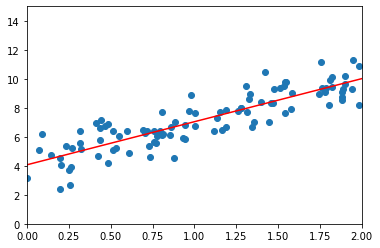

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])###
plt.show()

### Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07032588]), array([[2.97152368]]))

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# computes X_b.T.dot(X_b)).dot(X_b.T).dot(y

In [14]:
theta_best_svd

array([[4.07032588],
       [2.97152368]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.07032588],
       [2.97152368]])

## Gradient Descent

### Batch Gradient Descent

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # samples

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * (X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - eta * gradients
    
theta

array([[4.07032588],
       [2.97152368]])

### Stochastic Gradient Descent

In [30]:
n_epocs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epocs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
           
theta    

array([[3.99203393],
       [2.98787183]])

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [41]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.03498066]), array([2.9387122]))

## Polynomial Regression

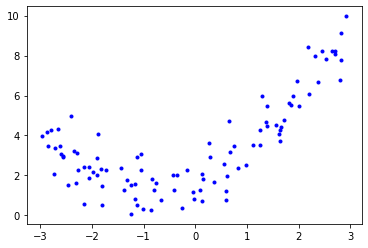

In [59]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0] ## X_poly[0] => [X[0], X[0]**2]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

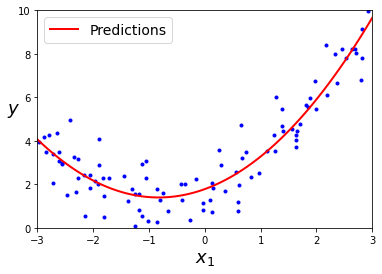

In [63]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

ridge_reg =  Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [69]:
# using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.80695161])

### Lasso Regression

In [71]:
from sklearn.linear_model import Lasso

lasso_reg =  Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [72]:
# using SGD
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79185095])

### Elastic Net

In [73]:
from sklearn.linear_model import ElasticNet

elastic_net =  ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## Logistic Regression

In [74]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [77]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [78]:
X = iris["data"][:, 3:]
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [80]:
y = (iris["target"] == 2).astype(np.int) # 1 if iris virginica

In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [83]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # make column vector
X_new[:2]

array([[0.      ],
       [0.003003]])

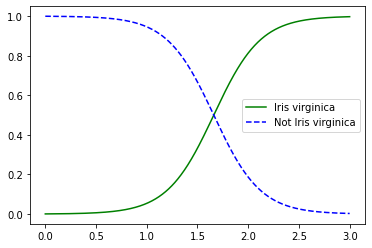

In [85]:
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

In [86]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

In [96]:
X = iris["data"][:, (2, 3)] # petal length and width
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [98]:
y = iris["target"]

In [99]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [100]:
softmax_reg.predict([[5, 2]])

array([2])

In [102]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
[]